Extract images from a Tensorboard log and create an animated GIF from it to show per epoch output evolution

In [ ]:
# %pip install imageio

In [67]:
import imageio
from tensorboard.backend.event_processing import event_accumulator
from IPython.display import Image as ImageIPython
from IPython.display import display
import numpy as np
from PIL import Image, ImageDraw, ImageFont

In [77]:
def extract_images_from_tensorboard_logs(event_file_path, tag_name):
    size_guidance = {
        'images': 0,  # I didn't set it first so only 4 images were fetched
    }
    accumulator = event_accumulator.EventAccumulator(event_file_path, size_guidance)
    accumulator.Reload()

    images = []
    for event in accumulator.Images(tag_name):
        img = event.encoded_image_string
        img = imageio.imread(img)
        img = Image.fromarray(img.astype(np.uint8))
        
        draw = ImageDraw.Draw(img)
        font = ImageFont.load_default()
        text = f"Step: {event.step:,}"
        
        _, height = img.size
        position = (10, height - 15)
        draw.text(position, text, font=font, fill="green")
        
        images.append(img)
    

    return images

def create_gif(images, output_file_path, fps=3):
    with imageio.get_writer(output_file_path, mode='I', fps=fps, loop=0) as writer:
        for image in images:
            writer.append_data(image)

C:\Users\robin\AppData\Local\Temp\ipykernel_39456\3258956166.py:11: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread(img)


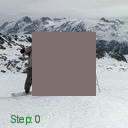

In [78]:
event_file_path = "Context_Encoder_Inpainting/lightning_logs/image_net_128_test_2/events.out.tfevents.1734222086.DESKTOP-FJJ9EF5.23524.0"
output_gif_path = "results_images/image_net_128_test_2.gif"
tag_name = "validation/inpainted_image_1"

# Extract images and save as GIF
images = extract_images_from_tensorboard_logs(event_file_path, tag_name)
create_gif(images, output_gif_path)

display(ImageIPython(filename=output_gif_path))